In [ ]:
# Перед проверкой загрузите файл "result_set.xlsx" в директорию
# Далее можно всё запускать и проверять

In [4]:
import torch
print(torch.__version__)
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data import random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn import  datasets
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.autograd import Variable
%matplotlib inline

2.6.0+cu126


In [5]:
df = pd.read_excel('result_set.xlsx')
df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ft0     5000 non-null   float64
 1   Ft1     5000 non-null   float64
 2   Ft2     5000 non-null   float64
 3   Ft3     5000 non-null   float64
 4   Ft4     5000 non-null   float64
 5   Ft5     5000 non-null   float64
 6   Ft6     5000 non-null   float64
 7   Ft7     5000 non-null   int64  
 8   Ft8     5000 non-null   object 
 9   Ft9     5000 non-null   object 
 10  Ft10    4936 non-null   float64
 11  Ft11    4950 non-null   object 
 12  Ft12    5000 non-null   int64  
 13  Ft13    5000 non-null   int64  
 14  Ft14    5000 non-null   int64  
 15  Ft15    4183 non-null   object 
 16  Ft16    5000 non-null   object 
 17  Ft17    5000 non-null   int64  
 18  mark    5000 non-null   int64  
dtypes: float64(8), int64(6), object(5)
memory usage: 742.3+ KB


In [6]:
# По-хорошему Null и NaN-значения бы заменить или проинтерполировать,
# но ввиду ограничений по времени было принято решения удалить данные
# При решении же реальных задач может повлечь потерю важной информации
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4089 entries, 1 to 4999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ft0     4089 non-null   float64
 1   Ft1     4089 non-null   float64
 2   Ft2     4089 non-null   float64
 3   Ft3     4089 non-null   float64
 4   Ft4     4089 non-null   float64
 5   Ft5     4089 non-null   float64
 6   Ft6     4089 non-null   float64
 7   Ft7     4089 non-null   int64  
 8   Ft8     4089 non-null   object 
 9   Ft9     4089 non-null   object 
 10  Ft10    4089 non-null   float64
 11  Ft11    4089 non-null   object 
 12  Ft12    4089 non-null   int64  
 13  Ft13    4089 non-null   int64  
 14  Ft14    4089 non-null   int64  
 15  Ft15    4089 non-null   object 
 16  Ft16    4089 non-null   object 
 17  Ft17    4089 non-null   int64  
 18  mark    4089 non-null   int64  
dtypes: float64(8), int64(6), object(5)
memory usage: 638.9+ KB


In [7]:
# По-хорошему, использовать OneHotEncoding,
# но в целях экономии времени будем использовать более "вредный" метод

labelencoder8 = LabelEncoder()
labelencoder9 = LabelEncoder()
labelencoder11 = LabelEncoder()
labelencoder15 = LabelEncoder()
labelencoder16 = LabelEncoder()

df['Ft8'] = labelencoder8.fit_transform(df['Ft8'].values)
df['Ft9'] = labelencoder9.fit_transform(df['Ft9'].values)
df['Ft11'] = labelencoder11.fit_transform(df['Ft11'].values)
df['Ft15'] = labelencoder15.fit_transform(df['Ft15'].values)
df['Ft16'] = labelencoder16.fit_transform(df['Ft16'].values)

df.head()

,Ft0,Ft1,Ft2,Ft3,Ft4,Ft5,Ft6,Ft7,Ft8,Ft9,Ft10,Ft11,Ft12,Ft13,Ft14,Ft15,Ft16,Ft17,mark
1,1.274494,0.814288,0.727210,3.606359,1.493780,7.810750,20.314335,24,0,0,846.0,0,3,1,1,2,1,1,0
2,0.569931,1.607170,0.479581,3.521474,1.663726,2.297903,12.839282,67,1,0,782.0,0,0,0,0,1,4,1,0
3,0.547560,1.724393,0.682358,1.809472,10.149721,2.999319,49.108530,42,1,2,132.0,0,3,3,0,2,1,0,0
6,0.767030,1.319940,1.590671,0.858546,1.654798,2.009758,13.605616,25,1,1,305.0,1,3,3,0,3,1,0,0
7,1.272277,1.991726,1.026694,0.338062,0.854855,0.662405,1.329156,64,1,0,619.0,1,0,0,0,1,0,1,0


In [ ]:
X = df.loc[:, df.columns != 'mark']
Y = df['mark']
Y.unique()

In [ ]:
X = np.array(X)
y = np.array(Y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(type(X))
print(type(X_scaled))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=True)

X_train = X_train.reshape(X_train.shape[0], 18, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 18, 1).astype('float32')

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (2862, 18, 1) (2862,)
Testing Shape (1227, 18, 1) (1227,)


In [ ]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.labels = torch.LongTensor(targets)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]

        x = torch.FloatTensor(x)
        y = torch.from_numpy(np.array(y))
        return x, y

    def __len__(self):
        return len(self.data)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cpu')

In [ ]:
train_dataset = MyDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=5)
test_dataset = MyDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=5)

In [ ]:
# Тут можно поиграться с некоторыми гиперпараметрами
# Например, с кол-вом слоёв или f-ями активации

class CNN(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CNN,self).__init__()

    self.relu = nn.ReLU(inplace=True)
    self.fc1 = nn.Linear(in_channels,50)
    self.fc2 = nn.Linear(50,num_classes)
    self.dp = nn.Dropout(0.42)

  def forward(self,x):
    x = self.relu(x)
    x = x.view(x.size(0), -1)
    x = self.dp(x)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dp(x)
    x = self.fc2(x)

    return x

  def training_step(self, batch):
    data, labels = batch
    out = self(data)                  # Generate predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    acc = accuracy(out, labels)           # Calculate accuracy
    return acc, loss

  def validation_step(self, batch):
    data, labels = batch
    out = self(data)                    # Generate predictions
    loss = F.cross_entropy(out, labels)   # Calculate loss
    acc = accuracy(out, labels)           # Calculate accuracy
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}]: train_acc: {:.4f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, result['train_acc'], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
train_dl = DeviceDataLoader(train_dataloader, device)
val_dl = DeviceDataLoader(test_dataloader, device)

In [ ]:
num_epochs = 100
# learning_rate = 0.0001
learning_rate = 0.00001

in_channels = X.shape[1]
num_classes = len(Y.unique())

model = to_device(CNN(in_channels, num_classes), device)
model

CNN(
  (relu): ReLU(inplace=True)
  (fc1): Linear(in_features=18, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
  (dp): Dropout(p=0.42, inplace=False)
)

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

@torch.no_grad()
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

best_acc = -np.inf
history = []
# Train the model
for epoch in range(num_epochs):
  # Training Phase
  # model.train()
  train_acc = []
  train_losses = []
  for batch in train_dl:
    acc, loss = model.training_step(batch)
    train_acc.append(acc)
    train_losses.append(loss)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  # Validation phase
  result = evaluate(model, val_dl)
  result['train_acc'] = torch.stack(train_acc).mean().item()
  result['train_loss'] = torch.stack(train_losses).mean().item()

  if result['val_acc']>best_acc:
    best_acc = result['val_acc']
    torch.save(model.state_dict(), 'cnn.pth')

  # Шаблон писался для другого датасета,
  # так что в целях лени и экономии времени название оставляю прежним

  model.epoch_end(epoch, result)
  history.append(result)

Epoch [0]: train_acc: 0.7700, train_loss: 0.5979, val_loss: 0.5693, val_acc: 0.8285
Epoch [1]: train_acc: 0.8476, train_loss: 0.5460, val_loss: 0.5168, val_acc: 0.9085
Epoch [2]: train_acc: 0.9173, train_loss: 0.4999, val_loss: 0.4729, val_acc: 0.9447
Epoch [3]: train_acc: 0.9529, train_loss: 0.4499, val_loss: 0.4285, val_acc: 0.9691
Epoch [4]: train_acc: 0.9672, train_loss: 0.4080, val_loss: 0.3797, val_acc: 0.9764
Epoch [5]: train_acc: 0.9791, train_loss: 0.3694, val_loss: 0.3509, val_acc: 0.9862
Epoch [6]: train_acc: 0.9832, train_loss: 0.3365, val_loss: 0.3217, val_acc: 0.9862
Epoch [7]: train_acc: 0.9825, train_loss: 0.3045, val_loss: 0.2913, val_acc: 0.9870
Epoch [8]: train_acc: 0.9864, train_loss: 0.2757, val_loss: 0.2643, val_acc: 0.9894
Epoch [9]: train_acc: 0.9864, train_loss: 0.2480, val_loss: 0.2372, val_acc: 0.9894
Epoch [10]: train_acc: 0.9864, train_loss: 0.2303, val_loss: 0.2228, val_acc: 0.9894
Epoch [11]: train_acc: 0.9864, train_loss: 0.2134, val_loss: 0.2041, val_ac

In [8]:
history

import torch
print(torch.__version__)
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data import random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn import  datasets
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.autograd import Variable
%matplotlib inline
df = pd.read_excel('result_set.xlsx')
df.columns = df.columns.str.replace(' ', '')
df.info()
df = pd.read_excel('result_set.xlsx')
df.columns = df.columns.str.replace(' ', '')
df.info()
import torch
print(torch.__version__)
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset

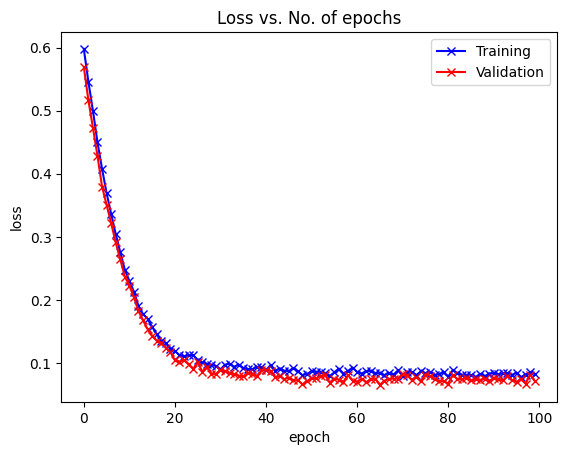

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

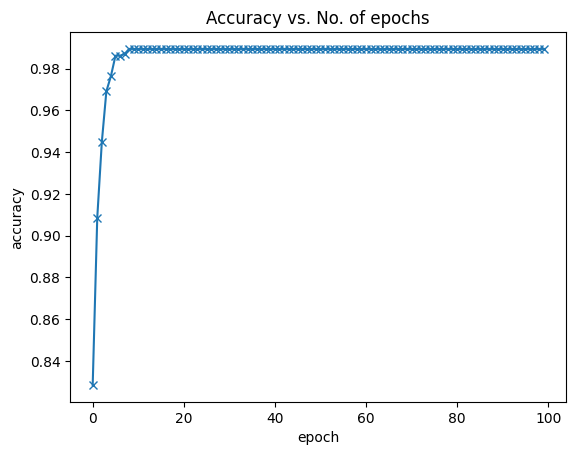

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=10), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.06667860597372055, 'val_acc': 0.989430844783783}

>loaded cnn.pth


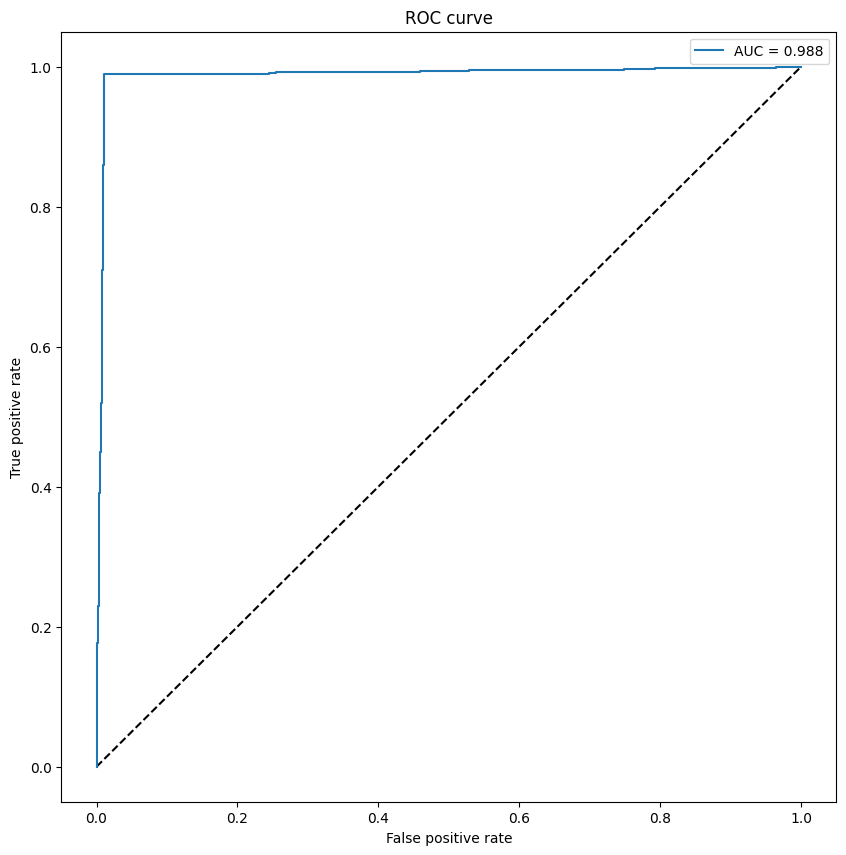

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# One hot encoding
enc = OneHotEncoder()
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

filename = "cnn.pth"
model.load_state_dict(torch.load(filename, map_location=device, weights_only=True))
print('>loaded %s' % filename)
model.to(device)
model.eval()
#to_device(model, device)

with torch.no_grad():
    y_pred = model(to_device(torch.FloatTensor(X_test), device))
    y_pred = y_pred.cpu().detach().numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [ ]:
from torch.autograd import Variable

file_name = "cnn.pth"
#model = LSTM(num_classes, input_size, hidden_size, num_layers)
model.load_state_dict(torch.load(file_name, weights_only=True))
print('>loaded %s' % file_name)
model.eval()

# Prediction
my_test = Variable(torch.from_numpy(X_test)).float()
model.to(device)
pred = model(to_device(my_test, device))
pred = pred.cpu().detach().numpy()
pred

>loaded cnn.pth


array([[ 1.4339218 , -0.39888203],
       [ 0.5639998 , -0.50076675],
       [ 1.1057202 , -0.86949617],
       ...,
       [ 1.217704  , -0.48831403],
       [ 1.4407622 , -0.6636882 ],
       [ 0.6593344 , -0.23960261]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
print ("The accuracy is", accuracy_score(y_test, np.argmax(pred, axis=1)))

The accuracy is 0.9894050529747351
